In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
added_classes = pd.read_csv ('Data/added_classes.csv')
class_0 = pd.read_csv ('Data/Class=0.csv')
class_1 = pd.read_csv ('Data/Class=1.csv')

In [4]:
added_classes

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,1,22,2,40,0,0,1,0,2,0
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,1,15,5,28,2,0,1,0,1,0
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,1,10,2,30,0,0,0,0,2,0
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,1,2,2,17,0,0,0,0,1,0
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,1,25,2,45,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13685,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13686,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13687,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0


# Analyze each cluster

In [206]:
# Group the data by cluster labels
cluster_groups = added_classes.groupby('Class')
id_column = 'NACCID'

# Loop through each cluster and analyze the characteristics
for cluster_label, cluster_data in cluster_groups:
    print(f"Cluster {cluster_label}:")
    # Get the statistics of numerical features within the cluster
    cluster_stats = cluster_data.drop(['Class', id_column], axis=1).describe()
    print(cluster_stats)

added_classes.head()

Cluster 0:
             CDRSUM         DECIN        MOSLOW        MEMORY        SPEECH  \
count  10884.000000  10884.000000  10884.000000  10884.000000  10884.000000   
mean       0.457093      0.911154      0.043183      0.186053     -0.428243   
std        0.859006      2.246606      0.203277      0.287771      1.326265   
min        0.000000      0.000000      0.000000      0.000000     -4.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.500000      1.000000      0.000000      0.500000      0.000000   
max        8.500000      9.000000      1.000000      2.000000      8.000000   

              BILLS        TRAVEL       MOFALLS        MOTREM       NACCAGE  \
count  10884.000000  10884.000000  10884.000000  10884.000000  10884.000000   
mean       0.218853     -0.025358      0.019478      0.021408     74.135244   
std        1.560643      0.897330      0

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,1,22,2,40,0,0,1,0,2,0
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,1,15,5,28,2,0,1,0,1,0
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,1,10,2,30,0,0,0,0,2,0
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,1,2,2,17,0,0,0,0,1,0
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,1,25,2,45,0,0,1,0,1,1


In [207]:
class_0.head()
class_0.describe()

,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,NACCAGE,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,...,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.0
mean,0.457093,0.911154,0.043183,0.186053,-0.428243,0.218853,-0.025358,0.019478,0.021408,74.135244,...,1.022786,18.236678,2.192944,39.835538,0.122841,0.203602,0.595369,0.099688,1.594910,0.0
std,0.859006,2.246606,0.203277,0.287771,1.326265,1.560643,0.897330,0.138205,0.144745,9.847700,...,0.426361,14.691731,1.416253,13.882978,0.541638,0.725281,0.671823,0.501110,0.490932,0.0
min,0.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000,-4.000000,0.000000,0.000000,24.000000,...,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,...,1.000000,7.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,...,1.000000,15.000000,2.000000,38.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.0
75%,0.500000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,...,1.000000,25.000000,3.000000,50.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.0
max,8.500000,9.000000,1.000000,2.000000,8.000000,9.000000,3.000000,1.000000,1.000000,101.000000,...,9.000000,99.000000,9.000000,86.000000,9.000000,9.000000,9.000000,9.000000,2.000000,0.0


Group 0:

For CDRSUM, a majority of this group of participant is in the normal category in the clinical rating scale.

For DECIN, from the histogram, we can see that a majority of this group wasn't reported to have a decline in memory. However, there are still cases were reported to have a decline in memory or unknown.

For MOSLOW, almost all participants were reported to have no meaningful changes in motor function.

For MEMORY, from the pie chart, we can see that a majority of this group has no memory impairment. However, there are still  cases that have questionable impaiment and a very little number of cases have mild/moderate impairment.

For SPEECH, no severe cases were reported, a majority of participants have normal speech and a few cases were reported to have slight loss of expression, diction, and/or volume; or not available

For BILLS, a majority of this group encountered no difficulties in writing checks, paying bills, or balancing a checkbook. However, there are still a few cases that encountered some difficulties but do by themselves.

For TRAVEL, a majority of this group encountered no difficulties in traveling out of the neighborhood, driving, or arranging to take public transportation. However, there are still a few cases that encountered some difficulties but do by themselves.

For MOFALLS, a majority of this group didn't experience more falls during the process.

For MOTREM, a majority of this group didn't experience more tremors during the process.

For NACCAGE, this follows a normal distribution with a mean of 70, this means that most participants in this cluster are 70 years old.

For NACCBMI, the data distribution is roughly normal with a mean of 26.98. The IQR is from 23.4 to 29.6. This suggests that a majority of participants are within the normal range / slightly overweight.   

For TOBAC30, a majority of this group didn't smoke during the last 30 days.

For TOBAC100, of those who smoke throughout their life, almost all participants smoked more than 100 cigarrets throughout their life.

For SMOKYRS, the mean (average) number of smoking years among the individuals is approximately 18.24 years. This suggests that, on average, individuals in the dataset have smoked for around 18 years.

For QUITSMOK, participants of this cluster quit smoking at various ages, but quitting is most popular at the mid 30s and early 50s.

For ALCOHOL, almost all participants did not abuse alcohol with a few cases did in the past but now inactive.

For DIABETES, almost all participants did not have diabetes or inactive diabetes with a few cases is currently having diabetes.

For HYPERTEN, half of the participants do not have hypertension, the other half have but this can be explained because of their old age.

For CVHATT, almost all participants did not have heart attack/cardiac arrest or inactive heart attack/cardiac arrest.

For SEX, a little more than half of the participants in this cluster are female.

Group 1:
For CDRSUM, there are more than half of the participants with normal or questionable impairment. However, in this cluster, there are a lot more people mild to moderate demetia than cluster 1.

For DECIN, almost all participants in this cluster are reported to have a decline in memory.

For MOSLOW, many participants were not reported to experience slowness. However, there is a significant increase in the number of reported cases of experienced slowness.

For MEMORY, most participants in this group were reported to have some type of memory impairment, with about 90% were reported to have questionable/mild/moderate impairment.

For SPEECH, there are a lot more people were reported to have slight loss of expression, diction, and/or volume than class 0.

For BILLS, most people in this group encountered difficulties to all levels when writing checks, paying bills, or balancing a
checkbook.

For TRAVEL, most people in this group encountered difficulties to all levels when traveling out of the neighborhood, driving, or arranging to take public transportation.

For MOFALLS, most people in this cluster weren't reported to fall more; however, there are more people that experienced fall in this group.

For MOTREM, most people in this cluster weren't reported to tremor more; however, there are more people that experienced tremor in this group.

For NACCAGE, most people in this group are 80 years old or more.

For NACCBMI, the mean BMI among 80-year-old individuals is approximately 26.49. A BMI of 26.49 falls into the  normal/overweight category according to the standard BMI categories.

For TOBAC 30, no significant difference from cluster 1.

For TOBAC 100, almost all participants in this group had smoked more than 100 cigaretts during their lifetime.

For SMOKYRS, the majority of people in this group smoked for about 20 years, and almost all people smoke for about 40 years or less.

For QUITSMOK, the data matches with SMOKYRS, we can see that most people in this group quit smoking at age 40 or less.

For ALCOHOL, most people in this group didn't have a history of abusing alcohol in the last 12 months or had been inactive. There are still a few cases that were reported to have abused alcohol in the last 12 months.

For DIABETES, no significant difference from class 0.

For HYPERTEN, the number of people that have hypertension are about the same to group 0. However, there are less people without hypertension than group 0.

For CVHATT, no significant difference from class 0. However, there are more people that were inactive than group 0.

For SEX, more male than female in this group.

Group 0 appears to consist of individuals who are generally healthier, with fewer reported impairments in memory, motor function, speech, and activities of daily living.

Group 1, on the other hand, seems to have a higher prevalence of memory decline, motor function issues, falls, tremors, and difficulties with daily activities.

Both groups have similar patterns in terms of smoking habits, alcohol abuse, diabetes, and heart health, but Group 1 tends to have slightly worse health outcomes overall.

Age distribution differs, with Group 1 consisting of older individuals on average.

There's also a slight difference in sex distribution, with Group 1 having more males compared to Group 0.

In [5]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'NA'
}

mapping2 = {
    0: 'No',
    1: 'Yes',
    9: 'Unknown',
    -4: 'NA'
}

mapping3 = {
    0.0: 'No impairment',
    0.5: 'Questionable impairment',
    1.0: 'Mild impairment',
    2.0: 'Moderate impairment',
    3.0: 'Severe impairment'
}
mapping4 = {
    0: 'Normal',
    1: 'Slight loss of expression',
    2: 'Moderately impaired',
    3: 'Marked impairment',
    4: 'Unintelligible',
    8: 'Untestable',
    -4: 'NA'
}

mapping5 = {
    0 : 'Normal',
    1 : 'Has difficulty, but does by self',
    2 : 'Requires assistance',
    3 : 'Dependent',
    8 : 'Not applicable (e.g., never did)',
    9 : 'Unknown',
    -4 : 'NA'
}

mapping6 = {
    1: 'Male',
    2: 'Female'
}

mapping7 = {
    0: 'No', 
    1: 'Yes',
    8: 'There is no co-participant',
    9: 'Unknown'
}


In [6]:
decode_class = {
    0: 'A',
    1: 'B'
}

added_classes['Class'] = added_classes['Class'].replace(decode_class)
class_0['Class'] = class_0['Class'].replace(decode_class)
class_1['Class'] = class_1['Class'].replace(decode_class)

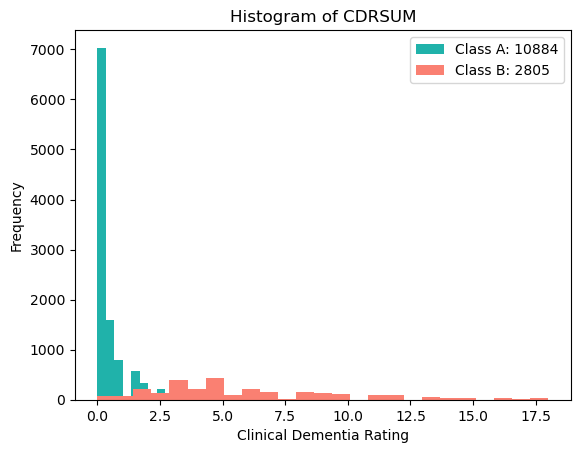

In [199]:
# Create histogram
plt.hist(class_0['CDRSUM'], color='lightseagreen', label='Class A: 10884', bins= 25)
plt.hist(class_1['CDRSUM'], color='salmon',  label='Class B: 2805', bins= 25)

# Add labels and title
plt.xlabel('Clinical Dementia Rating')
plt.ylabel('Frequency')
plt.title('Histogram of CDRSUM')
plt.legend(loc='upper right')
# Show plot
plt.show()

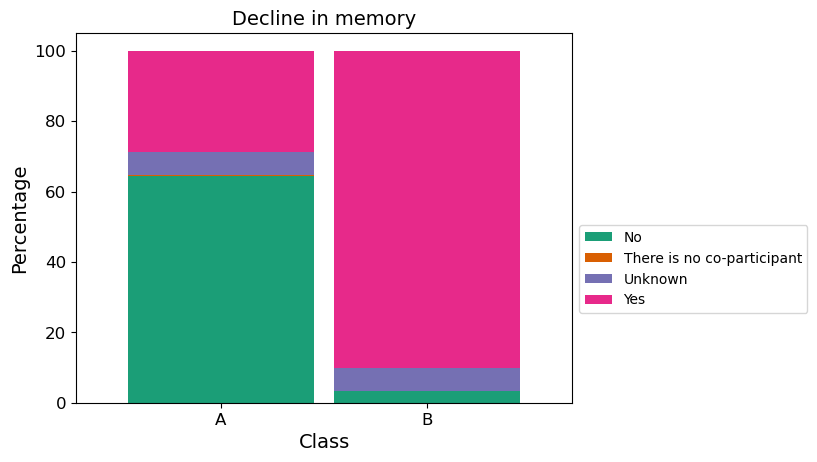

In [8]:
added_classes['DECIN'] = added_classes['DECIN'].replace(mapping7)

deccount = added_classes.groupby('Class')['DECIN'].value_counts()
deccount_df = deccount.to_frame(name='Count').reset_index()

deccount_df['Percentage'] = deccount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)

pivot_df = deccount_df.pivot(index='Class', columns='DECIN', values='Percentage')

colors = plt.cm.Dark2.colors[:4]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Decline in memory', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


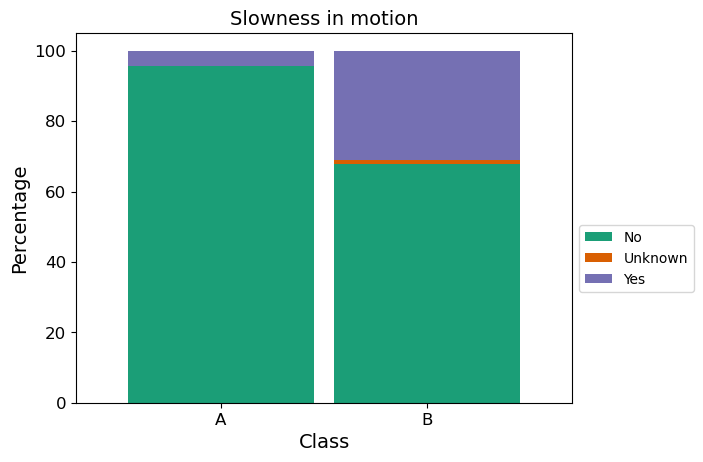

In [350]:
added_classes['MOSLOW'] = added_classes['MOSLOW'].replace(mapping2)

moscount = added_classes.groupby('Class')['MOSLOW'].value_counts()
moscount_df = moscount.to_frame(name='Count').reset_index()

moscount_df['Percentage'] = moscount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)

pivot_df = moscount_df.pivot(index='Class', columns='MOSLOW', values='Percentage')

colors = plt.cm.Dark2.colors[:4]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Slowness in motion', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


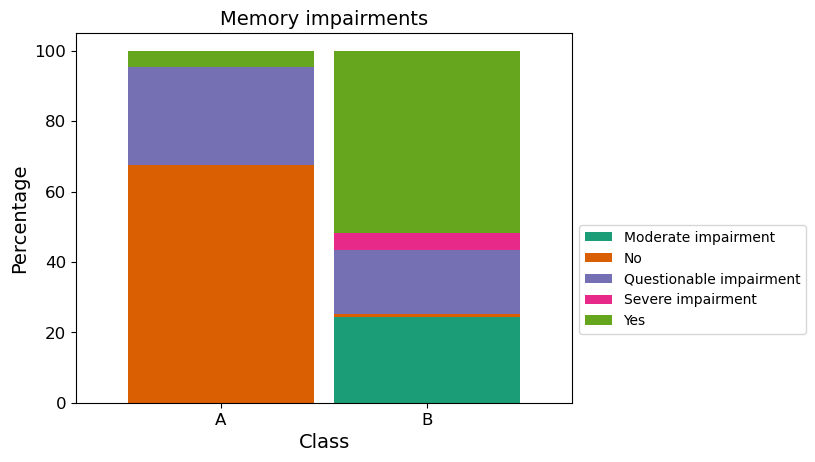

In [320]:

added_classes['MEMORY'] = added_classes['MEMORY'].replace(mapping3)

memcount = added_classes.groupby('Class')['MEMORY'].value_counts()
memcount_df = memcount.to_frame(name='Count').reset_index()

memcount_df['Percentage'] = memcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)

pivot_df = memcount_df.pivot(index='Class', columns='MEMORY', values='Percentage')

colors = plt.cm.Dark2.colors[:5]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Memory impairments', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


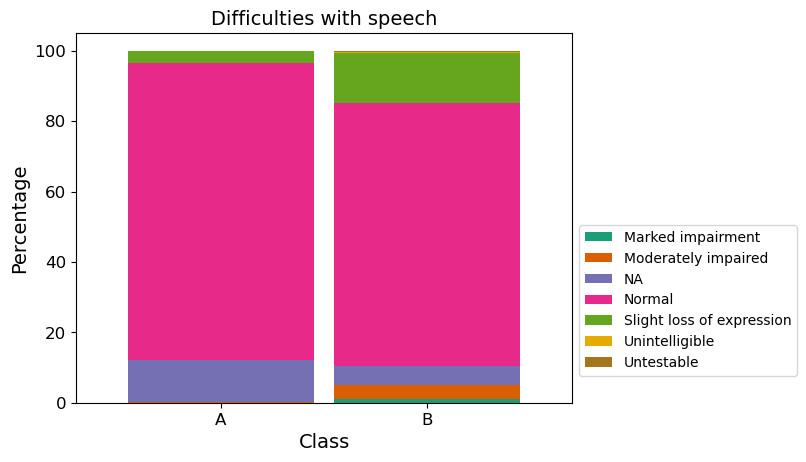

In [323]:
added_classes['SPEECH'] = added_classes['SPEECH'].replace(mapping4)

specount = added_classes.groupby('Class')['SPEECH'].value_counts()
specount_df = specount.to_frame(name='Count').reset_index()

specount_df['Percentage'] = specount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)

pivot_df = specount_df.pivot(index='Class', columns='SPEECH', values='Percentage')

colors = plt.cm.Dark2.colors[:7]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Difficulties with speech', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


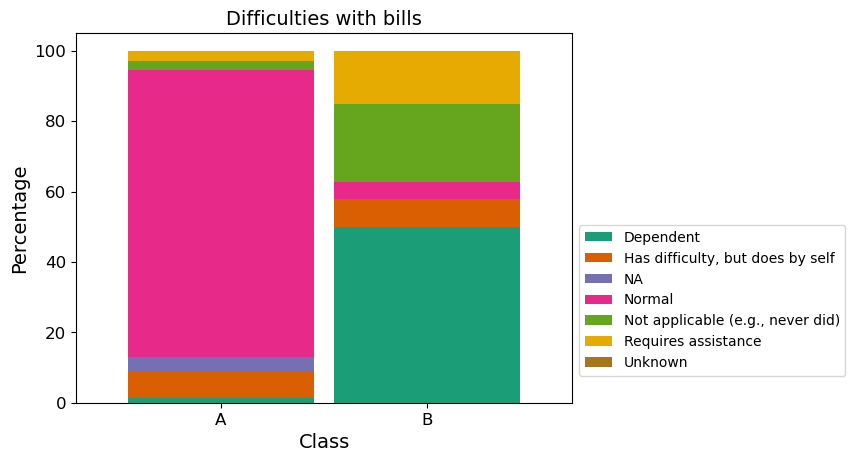

In [325]:
added_classes['BILLS'] = added_classes['BILLS'].replace(mapping5)

billcount = added_classes.groupby('Class')['BILLS'].value_counts()
billcount_df = billcount.to_frame(name='Count').reset_index()

billcount_df['Percentage'] = billcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = billcount_df.pivot(index='Class', columns='BILLS', values='Percentage')

colors = plt.cm.Dark2.colors[:7]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Difficulties with bills', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


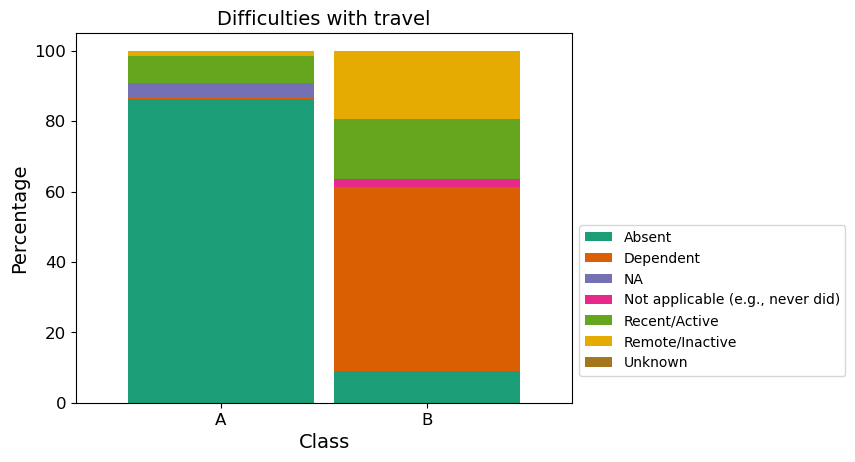

In [327]:

added_classes['TRAVEL'] = added_classes['TRAVEL'].replace(mapping5)

travelcount = added_classes.groupby('Class')['TRAVEL'].value_counts()
travelcount_df = travelcount.to_frame(name='Count').reset_index()

travelcount_df['Percentage'] = travelcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = travelcount_df.pivot(index='Class', columns='TRAVEL', values='Percentage')
colors = plt.cm.Dark2.colors[:7]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Difficulties with travel', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

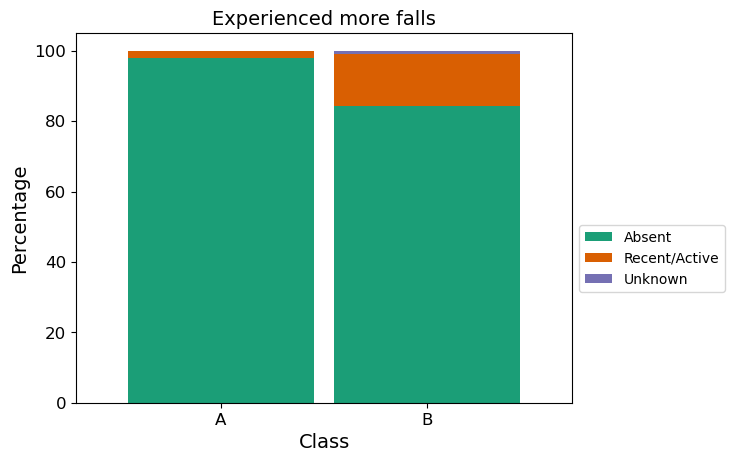

In [351]:

added_classes['MOFALLS'] = added_classes['MOFALLS'].replace(mapping)

fallscount = added_classes.groupby('Class')['MOFALLS'].value_counts()
fallscount_df = fallscount.to_frame(name='Count').reset_index()

fallscount_df['Percentage'] = fallscount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = fallscount_df.pivot(index='Class', columns='MOFALLS', values='Percentage')
colors = plt.cm.Dark2.colors[:3]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Experienced more falls', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

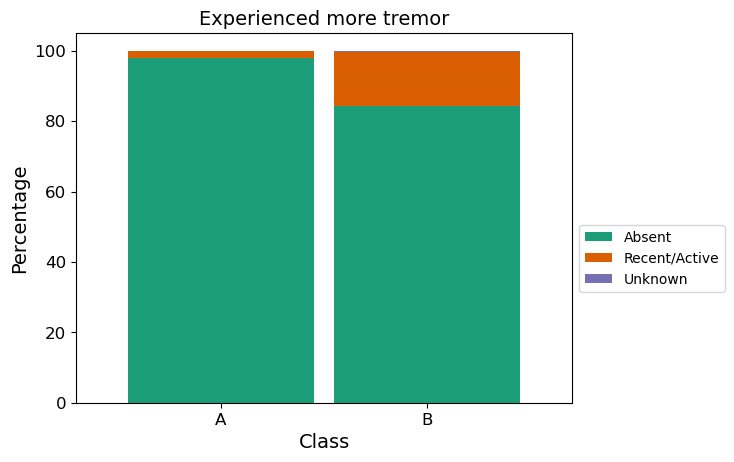

In [352]:
added_classes['MOTREM'] = added_classes['MOTREM'].replace(mapping)

tremcount = added_classes.groupby('Class')['MOTREM'].value_counts()
tremcount_df = tremcount.to_frame(name='Count').reset_index()

tremcount_df['Percentage'] = tremcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = tremcount_df.pivot(index='Class', columns='MOTREM', values='Percentage')
colors = plt.cm.Dark2.colors[:3]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Experienced more tremor', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

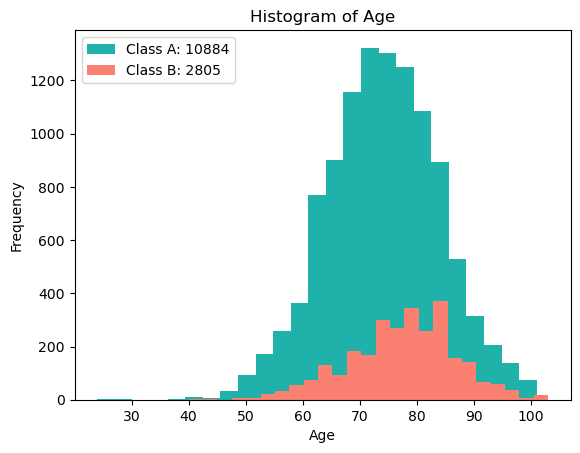

In [200]:
# Create histogram
plt.hist(class_0['NACCAGE'], color='lightseagreen', label='Class A: 10884', bins= 25)
plt.hist(class_1['NACCAGE'], color='salmon',label='Class B: 2805', bins= 25)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.legend(loc='upper left')
# Show plot
plt.show()

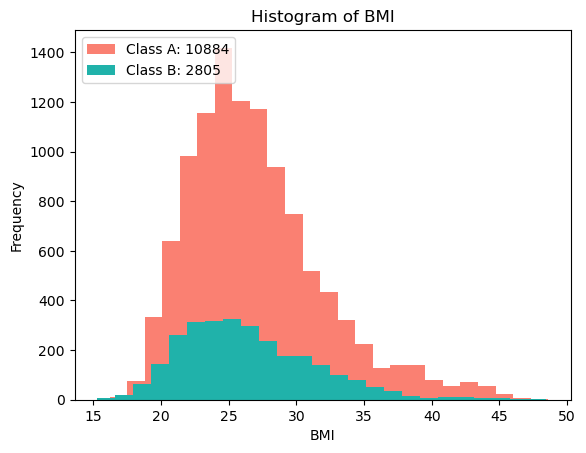

In [191]:
# Create histogram
plt.hist(class_0['NACCBMI'], color='salmon', label='Class A: 10884', bins= 25)
plt.hist(class_1['NACCBMI'], color='lightseagreen', label='Class B: 2805', bins= 25)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.legend(loc='upper left')
# Show plot
plt.show()

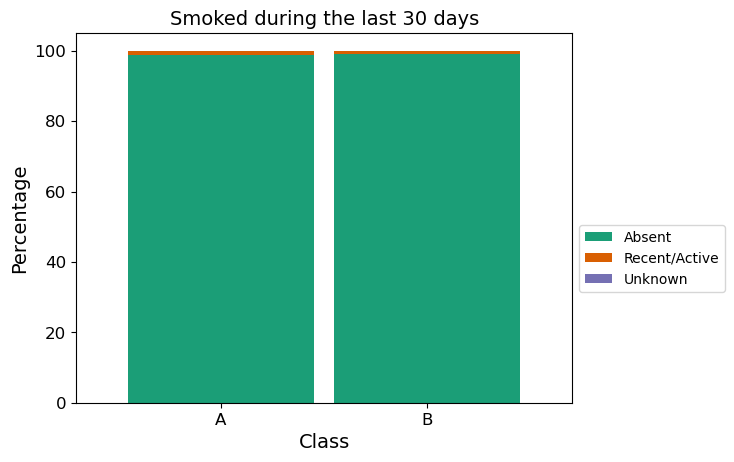

In [340]:
added_classes['TOBAC30'] = added_classes['TOBAC30'].replace(mapping)

t30count = added_classes.groupby('Class')['TOBAC30'].value_counts()
t30count_df = t30count.to_frame(name='Count').reset_index()

t30count_df['Percentage'] = t30count_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = t30count_df.pivot(index='Class', columns='TOBAC30', values='Percentage')
colors = plt.cm.Dark2.colors[:3]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Smoked during the last 30 days', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

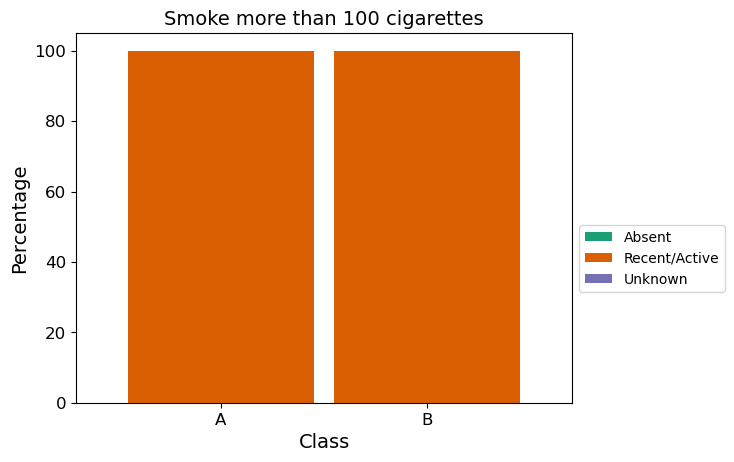

In [339]:
added_classes['TOBAC100'] = added_classes['TOBAC100'].replace(mapping)

t100count = added_classes.groupby('Class')['TOBAC100'].value_counts()
t100count_df = t100count.to_frame(name='Count').reset_index()

t100count_df['Percentage'] = t100count_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = t100count_df.pivot(index='Class', columns='TOBAC100', values='Percentage')
colors = plt.cm.Dark2.colors[:3]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Smoke more than 100 cigarettes', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

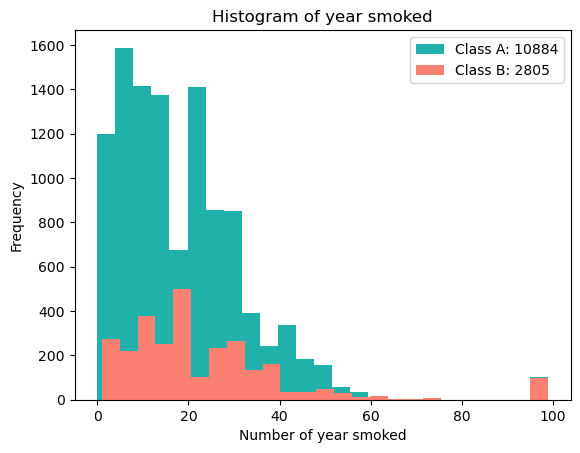

In [197]:
# Create histogram
plt.hist(class_0['SMOKYRS'], color='lightseagreen',  label='Class A: 10884', bins= 25)
plt.hist(class_1['SMOKYRS'], color='salmon', label='Class B: 2805', bins= 25)

# Add labels and title
plt.xlabel('Number of year smoked')
plt.ylabel('Frequency')
plt.title('Histogram of year smoked')
plt.legend(loc='upper right')
# Show plot
plt.show()

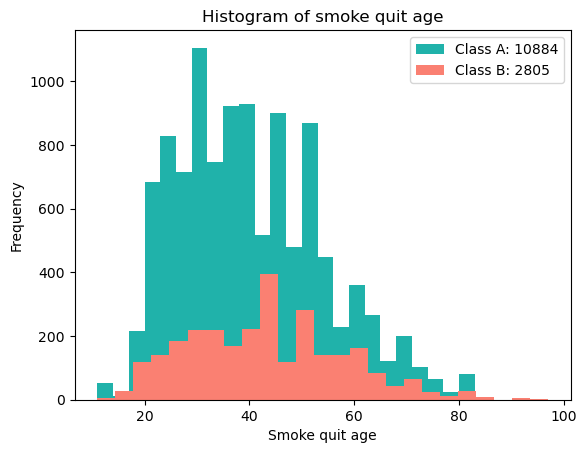

In [7]:
# Create histogram
plt.hist(class_0['QUITSMOK'], color='lightseagreen',label='Class A: 10884', bins= 25)
plt.hist(class_1['QUITSMOK'], color='salmon', label='Class B: 2805', bins= 25)


# Add labels and title
plt.xlabel('Smoke quit age')
plt.ylabel('Frequency')
plt.title('Histogram of smoke quit age')
plt.legend(loc='upper right')
# Show plot
plt.show()

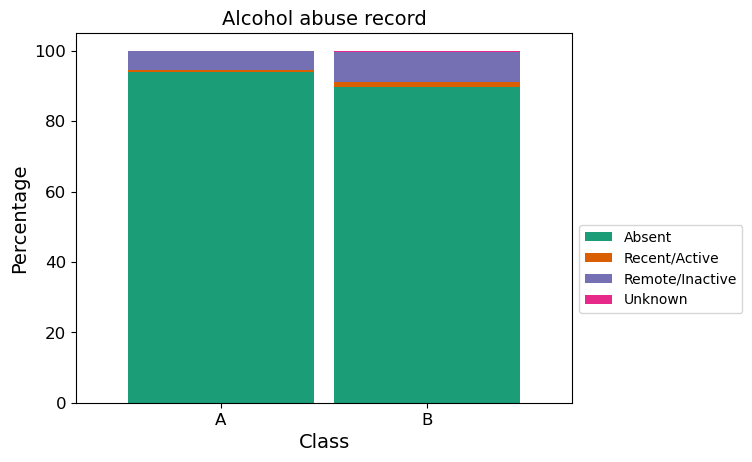

In [338]:
added_classes['ALCOHOL'] = added_classes['ALCOHOL'].replace(mapping)

alccount = added_classes.groupby('Class')['ALCOHOL'].value_counts()
alccount_df = alccount.to_frame(name='Count').reset_index()

alccount_df['Percentage'] = alccount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = alccount_df.pivot(index='Class', columns='ALCOHOL', values='Percentage')
colors = plt.cm.Dark2.colors[:4]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Alcohol abuse record', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

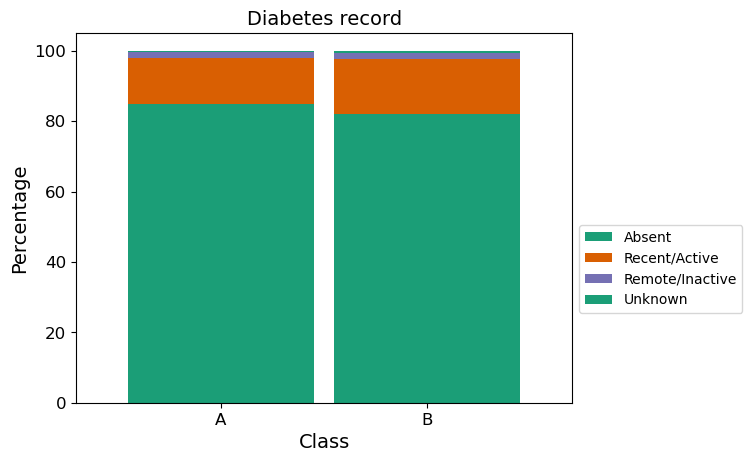

In [337]:
added_classes['DIABETES'] = added_classes['DIABETES'].replace(mapping)

diacount = added_classes.groupby('Class')['DIABETES'].value_counts()
diacount_df = diacount.to_frame(name='Count').reset_index()

diacount_df['Percentage'] = diacount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = diacount_df.pivot(index='Class', columns='DIABETES', values='Percentage')
colors = plt.cm.Dark2.colors[:3]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Diabetes record', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

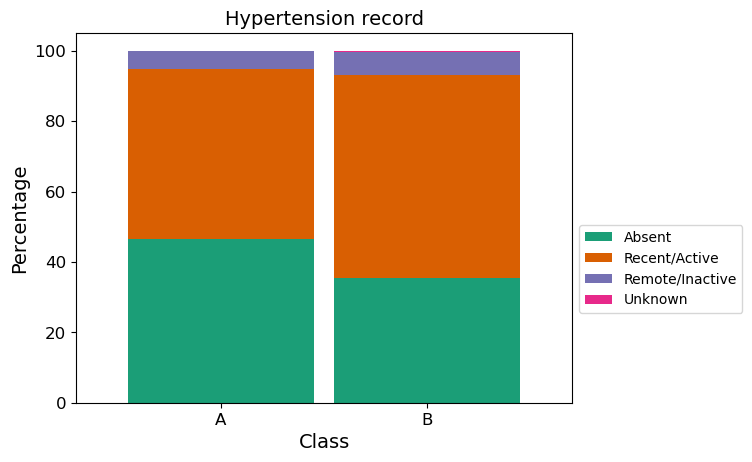

In [343]:
added_classes['HYPERTEN'] = added_classes['HYPERTEN'].replace(mapping)

hypcount = added_classes.groupby('Class')['HYPERTEN'].value_counts()
hypcount_df = hypcount.to_frame(name='Count').reset_index()

hypcount_df['Percentage'] = hypcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = hypcount_df.pivot(index='Class', columns='HYPERTEN', values='Percentage')
colors = plt.cm.Dark2.colors[:4]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Hypertension record', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

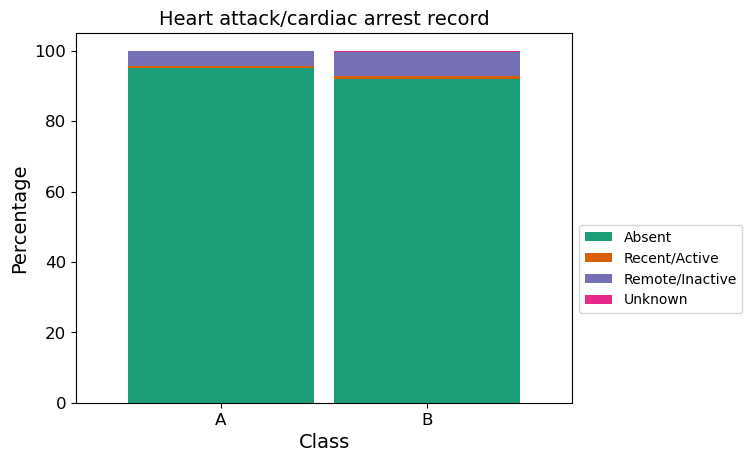

In [342]:
added_classes['CVHATT'] = added_classes['CVHATT'].replace(mapping)

cvhcount = added_classes.groupby('Class')['CVHATT'].value_counts()
cvhcount_df = cvhcount.to_frame(name='Count').reset_index()

cvhcount_df['Percentage'] = cvhcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = cvhcount_df.pivot(index='Class', columns='CVHATT', values='Percentage')
colors = plt.cm.Dark2.colors[:4]
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Heart attack/cardiac arrest record', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

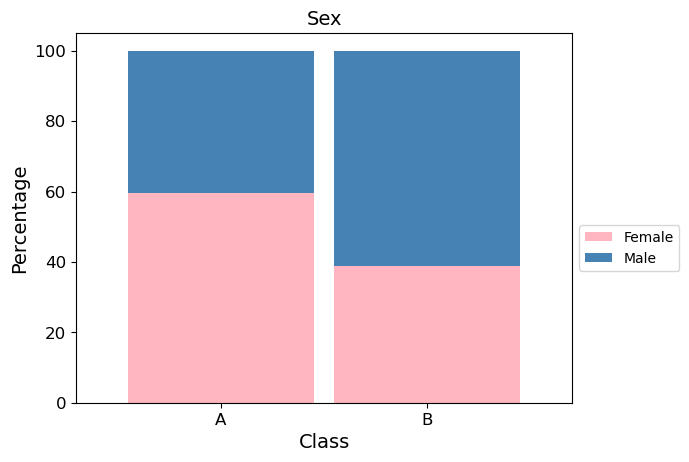

In [353]:
added_classes['SEX'] = added_classes['SEX'].replace(mapping6)

sexcount = added_classes.groupby('Class')['SEX'].value_counts()
sexcount_df = sexcount.to_frame(name='Count').reset_index()

sexcount_df['Percentage'] = sexcount_df.groupby('Class', group_keys=True)['Count'].transform(lambda x: x / x.sum() * 100)


pivot_df = sexcount_df.pivot(index='Class', columns='SEX', values='Percentage')
colors = ['lightpink', 'steelblue']
pivot_df.plot(kind='bar', stacked=True, color=colors, width=0.9 )

#plot adjustment
plt.title('Sex', size = 14)
plt.xlabel('Class', size= 14)
plt.xticks(size= 12,rotation='horizontal')
plt.yticks(size= 12)
plt.ylabel('Percentage', size= 14)
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()
